## Deep Learning Popularity Analysis

After analyse the popular tags amount [Stack Exchange](https://stackexchange.com/), I want to discover the trend of one of the most popular topic Deep learning, as it is also one of the domains that I am interested in.
<br>In this project we will</br>
- Count how many time the tag "Deep Learning" occurs and aggregate by quarters
- Calculate the total occure rate amount all the tags
- Plot a bar chart and line chart for both columns to present our result

In [16]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#import files
all_questions = pd.read_csv("All QueryResults.csv", parse_dates=['CreationDate'])
all_questions.head()

,Id,CreationDate,Tags
0,2627,2014-12-06 00:41:24,<javascript><visualization>
1,2628,2014-12-06 01:10:30,<logistic-regression>
2,2629,2014-12-06 06:53:14,<bigdata><definitions>
3,2631,2014-12-06 15:04:03,<machine-learning><data-mining><clustering><an...
4,2632,2014-12-06 17:56:53,<efficiency><map-reduce><performance><experime...


In [18]:
#Make Tags column easy to work with
all_questions['Tags']=all_questions['Tags'].str.replace("^<|>$","").str.split("><")
all_questions.head()

,Id,CreationDate,Tags
0,2627,2014-12-06 00:41:24,"[javascript, visualization]"
1,2628,2014-12-06 01:10:30,[logistic-regression]
2,2629,2014-12-06 06:53:14,"[bigdata, definitions]"
3,2631,2014-12-06 15:04:03,"[machine-learning, data-mining, clustering, an..."
4,2632,2014-12-06 17:56:53,"[efficiency, map-reduce, performance, experime..."


Since Deep learning has so many related topics, we will take into account all the related tags as deep learning ```"lstm"```,``` "cnn"```, ```"scikit-learn"```, ```"tensorflow"```,```"keras"```, ```"neural-network"```, ```"deep-learning"```. We will start by creating an function which check if each row of Tags include the topics above.

In [20]:
#create a function which check if a imput tag list contain any of the following topics
def deep(list_tag):
    for i in list_tag:
        if i in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            #if it contains return 1 inside the loop
            return 1
        #if it does not contain return 0 after the loop
        return 0
        
all_questions['DeepLearning']=all_questions['Tags'].apply(deep)
all_questions.head(5)

,Id,CreationDate,Tags,DeepLearning
0,2627,2014-12-06 00:41:24,"[javascript, visualization]",0
1,2628,2014-12-06 01:10:30,[logistic-regression],0
2,2629,2014-12-06 06:53:14,"[bigdata, definitions]",0
3,2631,2014-12-06 15:04:03,"[machine-learning, data-mining, clustering, an...",0
4,2632,2014-12-06 17:56:53,"[efficiency, map-reduce, performance, experime...",0


At the time I conducted this analysis, we do not have full year data prior to 2014 and after 2021, so we will extract data that are in between.

In [21]:
#Use dt.year() to extract all data betwee n2015 - 2020
all_dates = all_questions[(all_questions['CreationDate'].dt.year<2021)&(all_questions['CreationDate'].dt.year>2014)].copy()
all_dates.head()

,Id,CreationDate,Tags,DeepLearning
34,60567,2019-09-22 00:37:54,[natural-language-process],0
35,60569,2019-09-22 00:49:19,"[tensorflow, lstm, training]",1
36,60571,2019-09-22 02:33:04,"[random-forest, xgboost]",0
37,60572,2019-09-22 03:29:31,"[machine-learning, keras, perceptron]",0
38,60574,2019-09-22 07:59:19,"[machine-learning, kernel, mathematics]",0


We will use dt.year() and dt.month() to extract yearh and month and make a new column as quater for us to aggregate our data

In [25]:
#Create a function that calculate the quater of the year and month
def quoter(time):
    year = str(time)[:4]
    quarters = str(((time.month-1) // 3) + 1)
    return "{y}q{q}".format(y=year,q=quarters)

all_dates['quarter']=all_dates['CreationDate'].apply(quoter)
all_dates.head()

,Id,CreationDate,Tags,DeepLearning,quarter
34,60567,2019-09-22 00:37:54,[natural-language-process],0,2019q3
35,60569,2019-09-22 00:49:19,"[tensorflow, lstm, training]",1,2019q3
36,60571,2019-09-22 02:33:04,"[random-forest, xgboost]",0,2019q3
37,60572,2019-09-22 03:29:31,"[machine-learning, keras, perceptron]",0,2019q3
38,60574,2019-09-22 07:59:19,"[machine-learning, kernel, mathematics]",0,2019q3


In [31]:
#use groupby() and agg() to group dataset by quarter, create new column sum and size of Deeplearning
final=all_dates.groupby('quarter').agg({'DeepLearning':['sum','size']})
#rest index to make sure quarters are not in index
final.reset_index(inplace=True)
#drop multi index
final.columns=final.columns.droplevel()
final.rename(columns={"":"quarters","sum":"DeepLearning Count","size":"Total Count"},inplace=True)
#new column calculate the Deeplearning occure rate
final['DeepLearning Rate']=(final['DeepLearning Count']/final['Total Count'])*100
final.sort_values('DeepLearning Rate',ascending=False).head()

,quarters,DeepLearning Count,Total Count,DeepLearning Rate
23,2020q4,342,1543,22.164614
21,2020q2,497,2266,21.932921
14,2018q3,317,1461,21.697467
22,2020q3,369,1755,21.025641
16,2019q1,360,1735,20.749280


Let's create a bar and line chart to present our finding

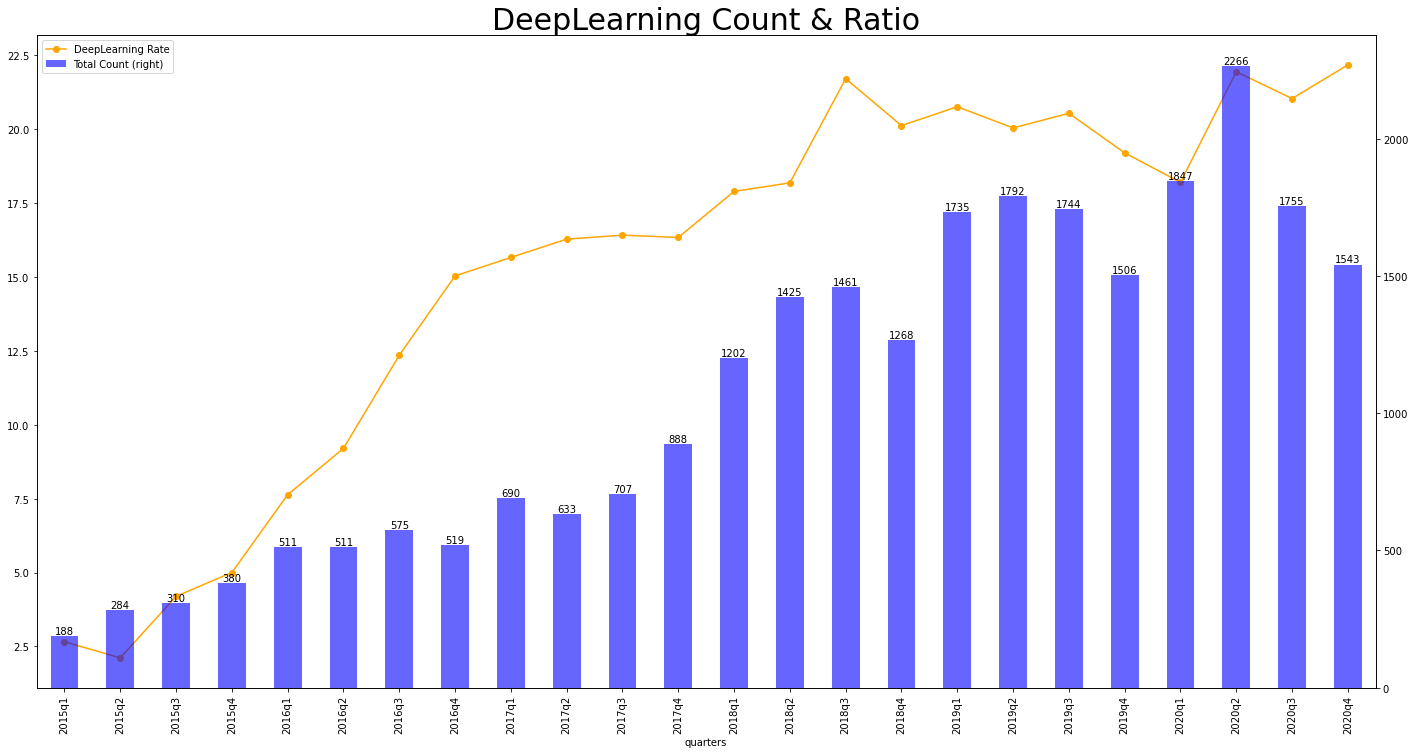

In [51]:
ax1=final.plot.line(x="quarters",y="DeepLearning Rate", color="Orange", marker="o", figsize=(24,12))
ax2=final.plot.bar(x="quarters",y="Total Count",color='blue', ax=ax1,alpha=0.6,secondary_y=True)
plt.title("DeepLearning Count & Ratio", fontsize=30)

#Create barchar tooltip label
for idx, t in final["Total Count"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")


## Result

- As we can see that the number of posts that contain Deep learning is increasing with time, the highest amount occured in the second quarters of 2020. The highest rate are spotted in the third quarter of 2018.
- Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning. This will become our future as many company and technology started to put efforts in developing automation and machine learning algorithms.
